In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\prana\Downloads\Retail_Sales_Prediction.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df["Item_Identifier"]

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [5]:
df.shape

(8523, 12)

In [6]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
FDG09     9
FDD38     9
FDV38     9
         ..
FDQ60     1
FDE52     1
FDO33     1
FDT35     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [9]:
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].median())

In [10]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df["Outlet_Size"]=df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
import seaborn as sb

In [14]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
FDG09     9
FDD38     9
FDV38     9
         ..
FDQ60     1
FDE52     1
FDO33     1
FDT35     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

<AxesSubplot:xlabel='Item_Weight'>

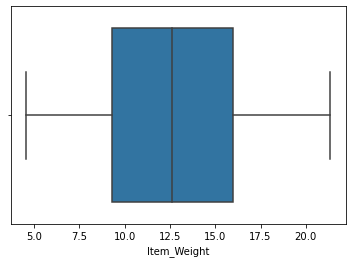

In [15]:
sb.boxplot(x="Item_Weight",data=df)

<AxesSubplot:xlabel='Item_Visibility'>

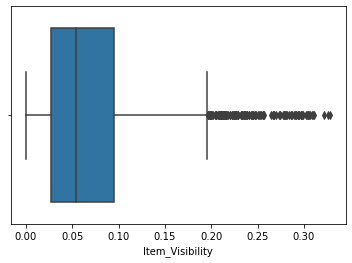

In [16]:
sb.boxplot(x="Item_Visibility",data=df)

<AxesSubplot:xlabel='Item_MRP'>

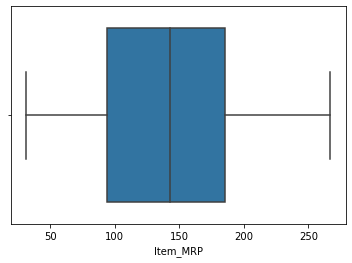

In [17]:
sb.boxplot(x="Item_MRP",data=df)

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

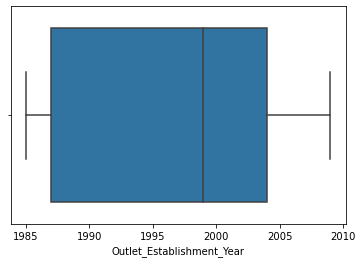

In [18]:
sb.boxplot(x="Outlet_Establishment_Year",data=df)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
mms=MinMaxScaler()
x=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']
y=np.log(y)
scaled_x=mms.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)

In [21]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [22]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.1,random_state=20)

In [23]:
train_x.shape

(7670, 11)

In [24]:
test_x.shape

(853, 11)

In [25]:
from sklearn.model_selection import KFold
def kfoldpred(model):
    kfold=KFold(5)
    scores=[]
    for i,j in kfold.split(train_x,train_y):
        x_train,x_test=train_x.iloc[i],train_x.iloc[j]
        y_train,y_test=train_y.iloc[i],train_y.iloc[j]
        model.fit(x_train,y_train)
        scores.append(model.score(x_test,y_test))
    return np.mean(scores)

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
kfoldpred(dt)
pred_dt=dt.predict(test_x)
pred_dt=pd.DataFrame(pred_dt,columns=["pred"])

In [32]:
dt.score(test_x,test_y)

0.4165683279028851

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=50,max_leaf_nodes=100)
kfoldpred(rf)
pred_rf=rf.predict(test_x)
pred_rf=pd.DataFrame(pred_rf,columns=["pred"])

In [33]:
rf.score(test_x,test_y)

0.7723825066497657

In [34]:
!pip install xgboost

In [35]:
from xgboost import XGBRegressor
xg=XGBRegressor(max_depth=20)
kfoldpred(xg)
pred_xg=xg.predict(test_x)
pred_xg=pd.DataFrame(pred_xg,columns=["pred"])

In [36]:
xg.score(test_x,test_y)

0.6904884254697163

In [45]:
from statistics import median
ensembled_pred=[]
for i in range(0,len(test_x)):
    ensembled_pred.append(median([pred_dt["pred"][i],pred_rf["pred"][i],pred_xg["pred"][i]]))

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(ensembled_pred,test_y)

0.651725574074763